# Linear Regression with Python

## Regularization in regression using Python

### What is linear regression?
Linear Regression attempts to find a relationship between a dependent variable and one or more explantory (or independent) variables. In case of simple linear regression where there is only one explanatory variable, linear regression is described as a general equation as shown below.

\begin{align}
y = b_0 + b_1x + \epsilon
\end{align}

where y is the dependent variable, x is the explanatory variable with coefficient b<sub>1</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

For **multiple linear regression**, we have two or more explanatory variables so the equation. It is described as a general equation as shown below. 

\begin{align}
y = b_0 + b_1x_1 + ... + b_px_p + \epsilon 
\end{align}

where y is the dependent variable, x<sub>1</sub>...x<sub>p</sub> are the explanatory variables with regression coefficients b<sub>1</sub>...b<sub>p</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

### What is regularization?
Regularization is a kind of regression that shrinks the coefficient estimates towards zero. This techniques discourages formation of a complex model, so as to avoid risk of overfitting.

#### Underfitting and Overfitting
* Underfitting occurs when a model is not able to capture the underlying trend of the data.
* Overfitting occurs when a model follows the trend of training data very closely but is not able to replicate the same performance on testing data.

A good fit model generalizes well and neither underfits nor overfits.

In [1]:
# Import Libraries
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import mutual_info_regression, f_regression, RFE, SelectKBest
from sklearn.preprocessing import PolynomialFeatures

### About the dataset
This is a simulated dataset made for teaching regression containing 10 independent variables named **Feat01, Feat02..., Feat10** and a dependent variable called **Target**. 

### The task
The task at hand is to predict the **Target** variable such that the values of predictions are as close to the actual values as possible. This will be done using a multiple linear regression model.

In [2]:
# Loading data
data = pd.read_csv("data.csv")
data.head()

,Feat01,Feat02,Feat03,Feat04,Feat05,Feat06,Feat07,Feat08,Feat09,Feat10,Target
0,0,11617.463,135.935905,10960,491.597396,80.714963,0.675678,16.891946,0.506758,1.198996,137
1,0,1086607.005,1983.900611,13065,1391.028397,64.221576,0.880523,0.146754,0.146754,1.230974,335
2,0,37945.952,2726.252884,8772,222.952910,37.589307,0.325336,16.266790,0.488004,1.208015,172
3,0,79471.821,3448.065646,36414,883.345912,662.170505,0.257565,0.000000,0.128782,1.256901,867
4,1,5486.580,1509.753541,13040,742.253326,99.315014,0.129816,0.000000,0.129816,1.255410,815


In [3]:
X = data.drop(["Target"],axis=1) # Explanatory(independent) variables
y = data["Target"] # Dependent variable

### Train/test split
Data is divided into training and test set. Training set is used to train the linear model and test set is used evaluate the trained model. Here, we are using 70% data in the training set, leaving 30% data for the test set. The train-test set ratio is determined keeping in mind the size of data. Larger test sets (around 20-30% data) provide more reliable evaluation results but at the same time training set should be enough so that underfitting does not occur.

In [4]:
# A 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)

### Training a linear regression model
We will train a linear regression model using all ten available features. The `fit` method of the `LinearRegression()` class trains models and estimates the best possible intercept and coefficient(s). 

In [5]:
# Fitting a linear model for multiple linear regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# The coefficients for each columns
model_coefs = pd.DataFrame({'Feature/Column':list(X_train.columns),"Coef_linear":model.coef_})
model_coefs

,Feature/Column,Coef_linear
0,Feat01,2.319425
1,Feat02,0.000010
2,Feat03,0.006078
3,Feat04,0.001139
4,Feat05,0.013329
5,Feat06,0.111174
6,Feat07,0.511887
7,Feat08,-0.123155
8,Feat09,-16.116907
9,Feat10,11177.060571


In [7]:
# The model's intercept
model.intercept_

-13397.877366112254

### Taking predictions
We can use `predict` method to take predictions of the test set.

In [8]:
# Taking predictions
y_pred = model.predict(X_test)

### Model Evaluation
We will be evaluating the model now. We will start by using the metrics R-squared score and RMSE.

In [9]:
print("The R-squared score is {:.4f}".format(r2_score(y_test,y_pred)))
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

The R-squared score is 0.8978
The Root Mean Squared error is 82.8497


In [10]:
r2_cross_val = cross_val_score(LinearRegression(),X,y,cv=3,scoring="r2")
print("The 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
rmse_cross_val = cross_val_score(LinearRegression(),X,y,cv=3,scoring="neg_root_mean_squared_error")
print("The 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

The 3-fold CV R^2 scores are [0.89411875 0.89787452 0.89275597] 
with a mean R^2 score of 0.8949
The 3-fold CV RMSE scores are [85.04847542209288, 83.56004204324616, 84.72165770028043] 
with a mean RMSE of 84.4434


### Ridge Regression
Ridge regression or L2 regularization brings values of coefficients near zero to enforce regularization. 

Penalty is described by $\lambda$ parameter. More the value of $\lambda$, lesser the flexibility. For low values of $\lambda$, the coefficients are very similar to that of a multiple linear regression model. As $\lambda$ increases, the differences between the results of Ridge model and linear regression model increase. 

Below is a demonstration where we use increasing values of $\lambda$ iteratively to show the effect of Ridge Regression.

In [11]:
alpha_values = [0.0001,0.001,0.01,0.1,1]
for i in alpha_values:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    model_coefs["Coef_ridge_alpha{}".format(i)] = ridge.coef_
    y_pred_new = ridge.predict(X_test)
    print("At alpha = {}".format(i))
    print("The R-squared score is {:.4f}".format(r2_score(y_test,y_pred_new)))
    print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred_new))))
    print("__________")

At alpha = 0.0001
The R-squared score is 0.8978
The Root Mean Squared error is 82.8499
__________
At alpha = 0.001
The R-squared score is 0.8978
The Root Mean Squared error is 82.8516
__________
At alpha = 0.01
The R-squared score is 0.8977
The Root Mean Squared error is 82.8773
__________
At alpha = 0.1
The R-squared score is 0.8952
The Root Mean Squared error is 83.8777
__________
At alpha = 1
The R-squared score is 0.8293
The Root Mean Squared error is 107.0405
__________


In [12]:
ridge_alpha_comparison = model_coefs.set_index("Feature/Column").apply(lambda x: np.abs(x),axis=1)
ridge_alpha_comparison

,Coef_linear,Coef_ridge_alpha0.0001,Coef_ridge_alpha0.001,Coef_ridge_alpha0.01,Coef_ridge_alpha0.1,Coef_ridge_alpha1
Feature/Column,,,,,,
Feat01,2.319425,2.319599,2.321161,2.336635,2.477652,3.195780
Feat02,0.000010,0.000010,0.000010,0.000010,0.000012,0.000022
Feat03,0.006078,0.006080,0.006095,0.006244,0.007603,0.014519
Feat04,0.001139,0.001139,0.001142,0.001169,0.001409,0.002635
Feat05,0.013329,0.013334,0.013378,0.013818,0.017823,0.038205
Feat06,0.111174,0.111202,0.111457,0.113988,0.137046,0.254387
Feat07,0.511887,0.505858,0.451653,0.085146,4.975513,29.790550
Feat08,0.123155,0.123240,0.124001,0.131536,0.200201,0.549791
Feat09,16.116907,16.128023,16.227966,17.217670,26.229101,71.682119


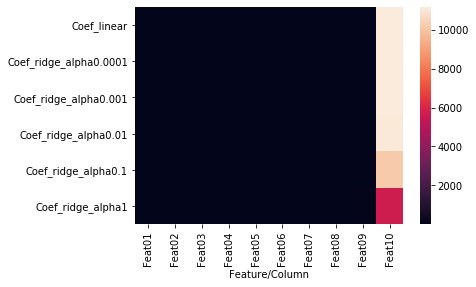

In [13]:
sns.heatmap(ridge_alpha_comparison.T)

In order to reduce the coefficient of strong regressor Feat10, the coefficients of other regressors have actually increased. So, there is an overall decrease in coefficient values but on an individual level, only Feat10's coefficient decreases constantly.

In [14]:
r2_cross_val = cross_val_score(Ridge(alpha=0.1),X,y,cv=3,scoring="r2")
print("At alpha = 0.1 , the 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
rmse_cross_val = cross_val_score(Ridge(alpha=0.1),X,y,cv=3,scoring="neg_root_mean_squared_error")
print("At alpha = 0.1 , the 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

At alpha = 0.1 , the 3-fold CV R^2 scores are [0.89168758 0.89639056 0.88963433] 
with a mean R^2 score of 0.8926
At alpha = 0.1 , the 3-fold CV RMSE scores are [86.01934616707074, 84.16494942320219, 85.94584379063265] 
with a mean RMSE of 85.3767


At $\lambda$ = 0.1, we have sacrificed negligible performance but the model is less likely to overfit.

**Conclusion:** As the coefficients of almost all variables were close to zero, not much decrease in value of coefficients was seen for variables other than Feat10. This might have happened due to large coefficient of Feat10.